### DECISION TREE CLASSIFICATION

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree


In [2]:
df=sns.load_dataset('titanic')
x=df[['pclass','sex','age','sibsp','parch','fare']]
y=df['survived']

In [3]:
x

,pclass,sex,age,sibsp,parch,fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,NaN,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [4]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [5]:
x.describe()

,pclass,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  891 non-null    int64  
 1   sex     891 non-null    object 
 2   age     714 non-null    float64
 3   sibsp   891 non-null    int64  
 4   parch   891 non-null    int64  
 5   fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [7]:
x['pclass'].unique()

array([3, 1, 2])

In [8]:
x['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [9]:
x['sibsp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

The `sibsp` column in the Titanic dataset represents the number of siblings or spouses aboard the Titanic. The appropriate datatype for this column is `int64`, which is an integer type. This is because the number of siblings or spouses is a whole number.

In [10]:
x.isnull().sum()

pclass      0
sex         0
age       177
sibsp       0
parch       0
fare        0
dtype: int64

In [11]:
y.isnull().sum()

np.int64(0)

In [12]:
#filling missing values
x['age'].fillna(x['age'].mean(),inplace=True)


C:\Users\qasim\AppData\Local\Temp\ipykernel_14480\283383937.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x['age'].fillna(x['age'].mean(),inplace=True)
C:\Users\qasim\AppData\Local\Temp\ipykernel_14480\283383937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['age'].fillna(x['age'].mean(),inplace=True)


In [13]:
x['age'].isnull().sum()

np.int64(0)

<Axes: xlabel='age', ylabel='Count'>

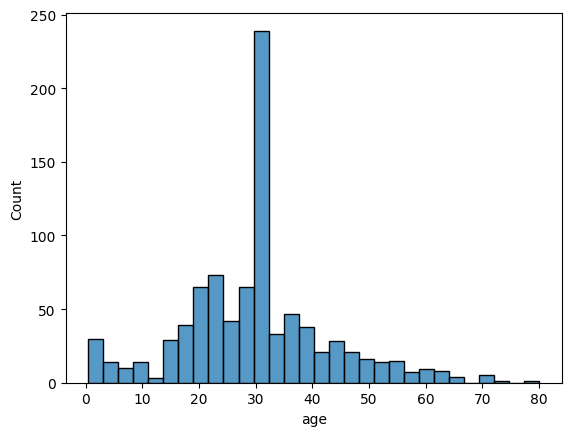

In [14]:
#check normization of age using plot
sns.histplot(x['age'])

In [15]:
x.describe()

,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
y.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64

In [17]:
x.head()

,pclass,sex,age,sibsp,parch,fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [18]:
x.head()

,pclass,sex,age,sibsp,parch,fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [19]:

x.head()
x['sex'] = x['sex'].apply(lambda s: 1 if s == 'male' else 0)

C:\Users\qasim\AppData\Local\Temp\ipykernel_14480\2779841696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sex'] = x['sex'].apply(lambda s: 1 if s == 'male' else 0)


In [20]:
x.head()

,pclass,sex,age,sibsp,parch,fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [21]:
x.isnull().sum()

pclass    0
sex       0
age       0
sibsp     0
parch     0
fare      0
dtype: int64

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
#apply decision tree classifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [24]:
y_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred))


Accuracy: 0.7821229050279329


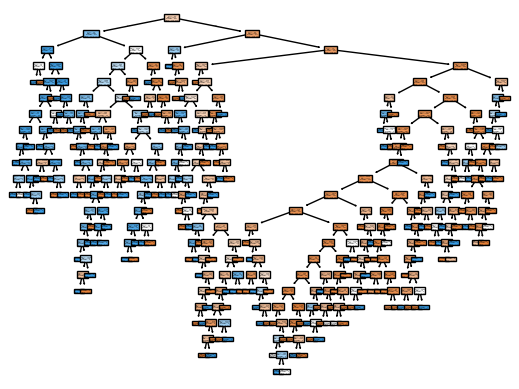

<Figure size 14000x8000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [25]:
tree.plot_tree(model.fit(x,y), filled=True)
plt.figure(figsize=(140,80))
plt.show()
plt.savefig('tree.pdf',format='pdf',dpi=300)

In [26]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision:',precision_score(y_test,y_pred))

Precision: 0.7586206896551724


In [27]:
print('Recall:',recall_score(y_test,y_pred))

Recall: 0.6376811594202898


In [28]:
print('f1_score:',f1_score(y_test,y_pred))

f1_score: 0.6929133858267716


In [29]:
#apply random forest classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)


RandomForestClassifier()

In [30]:
#predict the model
y_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred))


Accuracy: 0.8044692737430168


In [31]:
# precision,recall,f1_score
print('Precision:',precision_score(y_test,y_pred))
print('Recall:',recall_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))

Precision: 0.7833333333333333
Recall: 0.6811594202898551
f1_score: 0.7286821705426356


In [32]:
#draw confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm



array([[97, 13],
       [22, 47]])

<Axes: >

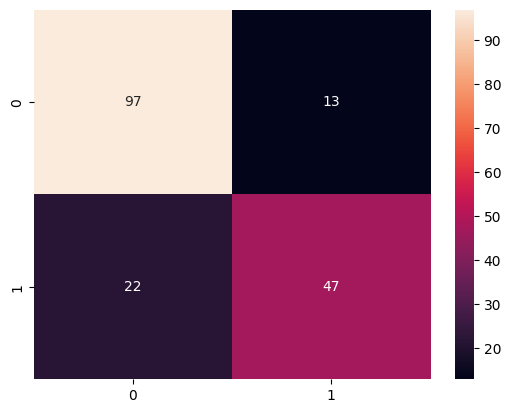

In [33]:
sns.heatmap(cm,annot=True)


### Precision, Recall, and F1 Score

**Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is a measure of the accuracy of the positive predictions. The formula for precision is:
\[ \text{Precision} = \frac{TP}{TP + FP} \]
where \( TP \) is the number of true positives and \( FP \) is the number of false positives.

**Recall**: Recall, also known as sensitivity or true positive rate, is the ratio of correctly predicted positive observations to all the observations in the actual class. It measures the ability of the model to capture all the positive cases. The formula for recall is:
\[ \text{Recall} = \frac{TP}{TP + FN} \]
where \( TP \) is the number of true positives and \( FN \) is the number of false negatives.

**F1 Score**: The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. The formula for the F1 score is:
\[ \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \]

These metrics are crucial for evaluating the performance of classification models, especially when dealing with imbalanced datasets.


In [72]:
#apply knn on x,y
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7)
model.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [73]:
#predict the model
y_pred=model.predict(x_test)
#check accuracy
print('Accuracy:',accuracy_score(y_test,y_pred))
#Draw on confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm


Accuracy: 0.7597765363128491


array([[93, 17],
       [26, 43]])

In [65]:
y_test.value_counts()

survived
0    110
1     69
Name: count, dtype: int64

In [74]:
#use random forest classifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred))


Accuracy: 0.8268156424581006


In [76]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[101,   9],
       [ 22,  47]])

In [77]:
#check precision,recall,f1_score
print('Precision:',precision_score(y_test,y_pred))
print('Recall:',recall_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))

Precision: 0.8392857142857143
Recall: 0.6811594202898551
f1_score: 0.752


In [78]:
#apply logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [79]:
#check accuracy
y_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred))


Accuracy: 0.7988826815642458


In [81]:
#check confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[94, 16],
       [20, 49]])

In [82]:
#check precision,recall,f1_score
print('Precision:',precision_score(y_test,y_pred))
print('Recall:',recall_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))

Precision: 0.7538461538461538
Recall: 0.7101449275362319
f1_score: 0.7313432835820896


In [83]:
#apply svm
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)


SVC()

In [84]:
#check accuracy
y_pred=model.predict(x_test)  
print('Accuracy:',accuracy_score(y_test,y_pred))



Accuracy: 0.7206703910614525


In [85]:
#check confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[104,   6],
       [ 44,  25]])

In [86]:
#check precision,recall,f1_score
print('Precision:',precision_score(y_test,y_pred))
print('Recall:',recall_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))

Precision: 0.8064516129032258
Recall: 0.36231884057971014
f1_score: 0.5


In [87]:
#apply naive bayes
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)


GaussianNB()

In [88]:
#check accuracy
y_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 0.7932960893854749


In [89]:
#check confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[90, 20],
       [17, 52]])

In [91]:
#check precision,recall,f1_score
print('Precision:',precision_score(y_test,y_pred))
print('Recall:',recall_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))


Precision: 0.7222222222222222
Recall: 0.7536231884057971
f1_score: 0.7375886524822695


# code to check which algorithm is best

In [92]:
from sklearn.model_selection import cross_val_score

# List of classifiers to evaluate
classifiers = {
      'Decision Tree': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'K-Nearest Neighbors': KNeighborsClassifier(),
      'Support Vector Machine': SVC(),
      'Naive Bayes': GaussianNB()
}

# Dictionary to store the cross-validation scores
cv_scores = {}

# Evaluate each classifier using cross-validation
for name, clf in classifiers.items():
      scores = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
      cv_scores[name] = scores.mean()

# Print the cross-validation scores
for name, score in cv_scores.items():
      print(f'{name}: {score:.4f}')

# Find the best classifier
best_classifier = max(cv_scores, key=cv_scores.get)
print(f'Best Classifier: {best_classifier} with score {cv_scores[best_classifier]:.4f}')

Decision Tree: 0.7711
Random Forest: 0.8104
K-Nearest Neighbors: 0.6970
Support Vector Machine: 0.6746
Naive Bayes: 0.7868
Best Classifier: Random Forest with score 0.8104


In [93]:
#use grid search cv
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20]
}
# Initialize the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
# Fit the model
grid_search.fit(x, y)
# Get the best hyperparameters
print(grid_search.best_params_)
# Get the best model
best_model = grid_search.best_estimator_
# Evaluate the best model
scores = cross_val_score(best_model, x, y, cv=5, scoring='accuracy')
print(f'Accuracy: {scores.mean():.4f}')


{'max_depth': 10, 'n_estimators': 200}
Accuracy: 0.8339
